# Global Superstore Dataset

# Importing Libraries and Loading Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder

%matplotlib inline 

df = pd.read_csv("Global-Superstore.csv", encoding = 'unicode-escape')
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,32298,CA-2012-124891,7/31/2012,7/31/2012,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical
1,26341,IN-2013-77878,2/5/2013,2/7/2013,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical
2,25330,IN-2013-71249,10/17/2013,10/18/2013,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,...,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium
3,13524,ES-2013-1579342,1/28/2013,1/30/2013,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,...,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium
4,47221,SG-2013-4320,11/5/2013,11/6/2013,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,...,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,29002,IN-2014-62366,6/19/2014,6/19/2014,Same Day,KE-16420,Katrina Edelman,Corporate,Kure,Hiroshima,...,OFF-FA-10000746,Office Supplies,Fasteners,"Advantus Thumb Tacks, 12 Pack",65.100,5,0.0,4.5000,0.01,Medium
51286,35398,US-2014-102288,6/20/2014,6/24/2014,Standard Class,ZC-21910,Zuschuss Carroll,Consumer,Houston,Texas,...,OFF-AP-10002906,Office Supplies,Appliances,Hoover Replacement Belt for Commercial Guardsm...,0.444,1,0.8,-1.1100,0.01,Medium
51287,40470,US-2013-155768,12/2/2013,12/2/2013,Same Day,LB-16795,Laurel Beltran,Home Office,Oxnard,California,...,OFF-EN-10001219,Office Supplies,Envelopes,"#10- 4 1/8"" x 9 1/2"" Security-Tint Envelopes",22.920,3,0.0,11.2308,0.01,High
51288,9596,MX-2012-140767,2/18/2012,2/22/2012,Standard Class,RB-19795,Ross Baird,Home Office,Valinhos,So Paulo,...,OFF-BI-10000806,Office Supplies,Binders,"Acco Index Tab, Economy",13.440,2,0.0,2.4000,0.00,Medium


# EDA

In [2]:
df.shape

(51290, 24)

### df.info()

In [4]:
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit,Shipping Cost
count,51290.00000,9994.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,25645.50000,55190.379428,246.490581,3.476545,0.142908,28.610982,26.375915
std,14806.29199,32063.693350,487.565361,2.278766,0.212280,174.340972,57.296804
min,1.00000,1040.000000,0.444000,1.000000,0.000000,-6599.978000,0.000000
25%,12823.25000,23223.000000,30.758625,2.000000,0.000000,0.000000,2.610000
50%,25645.50000,56430.500000,85.053000,3.000000,0.000000,9.240000,7.790000
75%,38467.75000,90008.000000,251.053200,5.000000,0.200000,36.810000,24.450000
max,51290.00000,99301.000000,22638.480000,14.000000,0.850000,8399.976000,933.570000


In [5]:
print(df.columns)

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'City', 'State', 'Country',
       'Postal Code', 'Market', 'Region', 'Product ID', 'Category',
       'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping Cost', 'Order Priority'],
      dtype='object')


In [6]:
print(df.Segment.value_counts())

Consumer       26518
Corporate      15429
Home Office     9343
Name: Segment, dtype: int64


In [7]:
print(df.Category.value_counts())

Office Supplies    31273
Technology         10141
Furniture           9876
Name: Category, dtype: int64


In [8]:
print(df['Sub-Category'].value_counts())

Binders        6152
Storage        5059
Art            4883
Paper          3538
Chairs         3434
Phones         3357
Furnishings    3170
Accessories    3075
Labels         2606
Envelopes      2435
Supplies       2425
Fasteners      2420
Bookcases      2411
Copiers        2223
Appliances     1755
Machines       1486
Tables          861
Name: Sub-Category, dtype: int64


In [9]:
df.isnull().sum()

Row ID                0
Order ID              0
Order Date            0
Ship Date             0
Ship Mode             0
Customer ID           0
Customer Name         0
Segment               0
City                  0
State                 0
Country               0
Postal Code       41296
Market                0
Region                0
Product ID            0
Category              0
Sub-Category          0
Product Name          0
Sales                 0
Quantity              0
Discount              0
Profit                0
Shipping Cost         0
Order Priority        0
dtype: int64

In [10]:
df.drop(columns=['Row ID','Order ID','Order Date','Ship Date','Customer ID','Customer Name','Postal Code','Product ID',
                 'Product Name'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Ship Mode       51290 non-null  object 
 1   Segment         51290 non-null  object 
 2   City            51290 non-null  object 
 3   State           51290 non-null  object 
 4   Country         51290 non-null  object 
 5   Market          51290 non-null  object 
 6   Region          51290 non-null  object 
 7   Category        51290 non-null  object 
 8   Sub-Category    51290 non-null  object 
 9   Sales           51290 non-null  float64
 10  Quantity        51290 non-null  int64  
 11  Discount        51290 non-null  float64
 12  Profit          51290 non-null  float64
 13  Shipping Cost   51290 non-null  float64
 14  Order Priority  51290 non-null  object 
dtypes: float64(4), int64(1), object(10)
memory usage: 5.9+ MB


In [11]:
le = LabelEncoder()

df['Ship Mode'] = le.fit_transform(df['Ship Mode'])
df['Segment'] = le.fit_transform(df['Segment'])
df['Country'] = le.fit_transform(df['Country'])



# Visualization of Data

C:\Users\praty\AppData\Local\Temp\ipykernel_24584\1851515244.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.boxplot(x="variable", y="value", data=pd.melt(df.corr()), width=1)


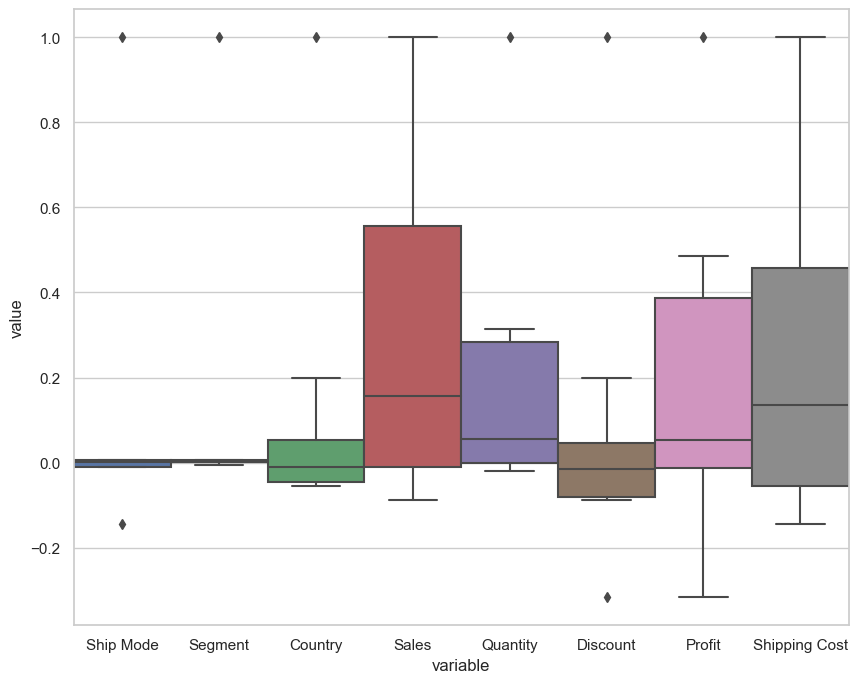

In [38]:
#BoxPlot
##variable vs value
plt.figure(figsize=[10,8])
sns.set(style="whitegrid")
sns.boxplot(x="variable", y="value", data=pd.melt(df.corr()), width=1)

plt.show()

In [13]:
###########heatmap
corr = df.corr()
corr.style.background_gradient(cmap='Blues')

C:\Users\praty\AppData\Local\Temp\ipykernel_24584\240134066.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


,Ship Mode,Segment,Country,Sales,Quantity,Discount,Profit,Shipping Cost
Ship Mode,1.000000,0.005935,-0.008987,0.001083,0.004688,-0.009721,0.002523,-0.145188
Segment,0.005935,1.000000,0.005632,0.001847,0.001593,-0.004460,0.002797,0.000334
Country,-0.008987,0.005632,1.000000,-0.046150,-0.011571,0.198955,-0.053919,-0.047310
Sales,0.001083,0.001847,-0.046150,1.000000,0.313577,-0.086722,0.484918,0.768073
Quantity,0.004688,0.001593,-0.011571,0.313577,1.000000,-0.019875,0.104365,0.272649
Discount,-0.009721,-0.004460,0.198955,-0.086722,-0.019875,1.000000,-0.316490,-0.079056
Profit,0.002523,0.002797,-0.053919,0.484918,0.104365,-0.316490,1.000000,0.354441
Shipping Cost,-0.145188,0.000334,-0.047310,0.768073,0.272649,-0.079056,0.354441,1.000000


C:\Users\praty\AppData\Local\Temp\ipykernel_24584\4167422342.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),linewidths=0.25,vmax=1.0, square=True, cmap="Blues", linecolor='k', annot=True)


<AxesSubplot: title={'center': 'Pearson Correlation of features'}>

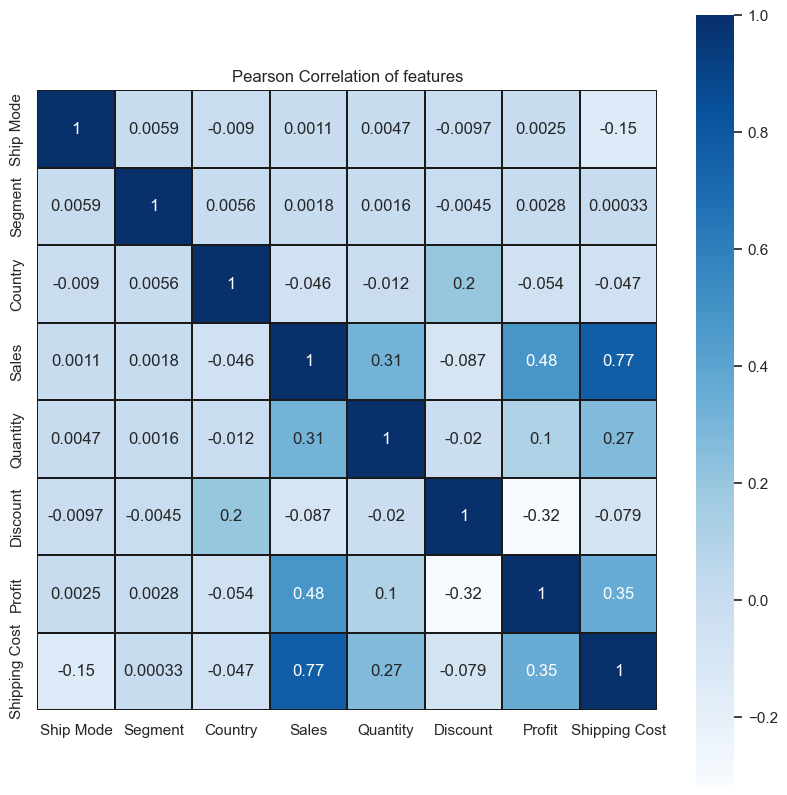

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

f, ax = plt.subplots(figsize=(10, 10))
plt.title('Pearson Correlation of features')
sns.heatmap(df.corr(),linewidths=0.25,vmax=1.0, square=True, cmap="Blues", linecolor='k', annot=True)


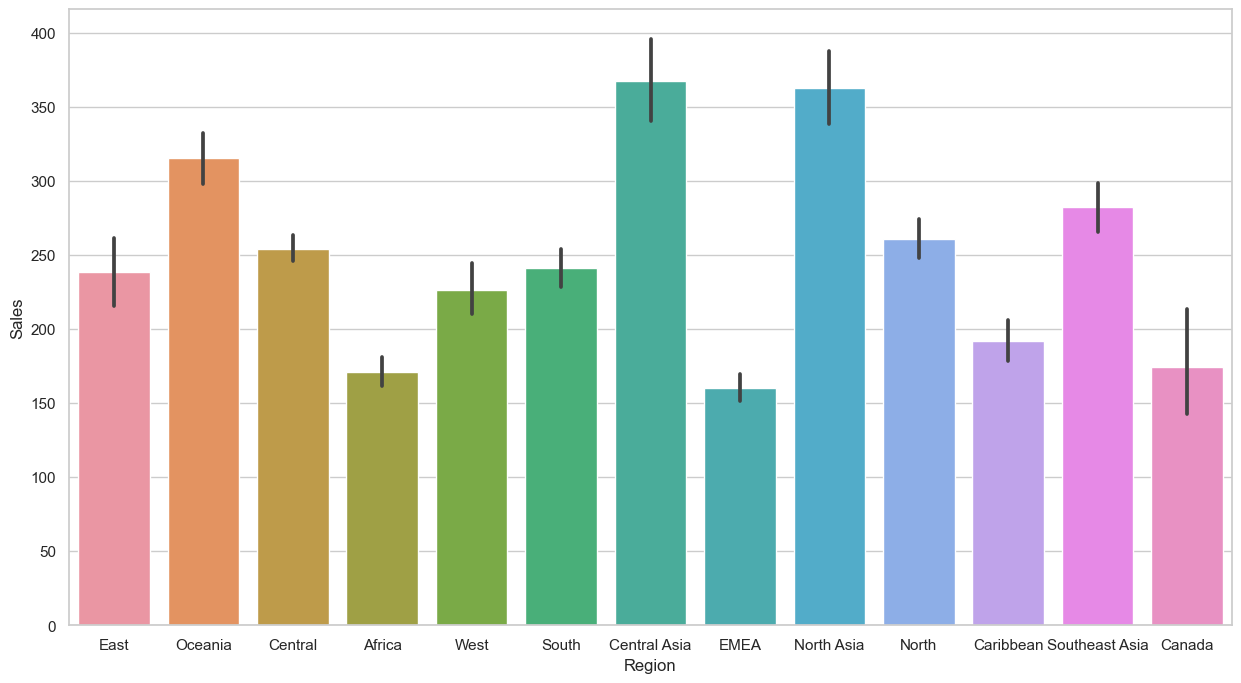

In [15]:
plt.figure(figsize=[15,8])
ax = sns.barplot(x="Region", y="Sales", data=df)

Observation: The south region is leading the sales followed by central,west, east and so on

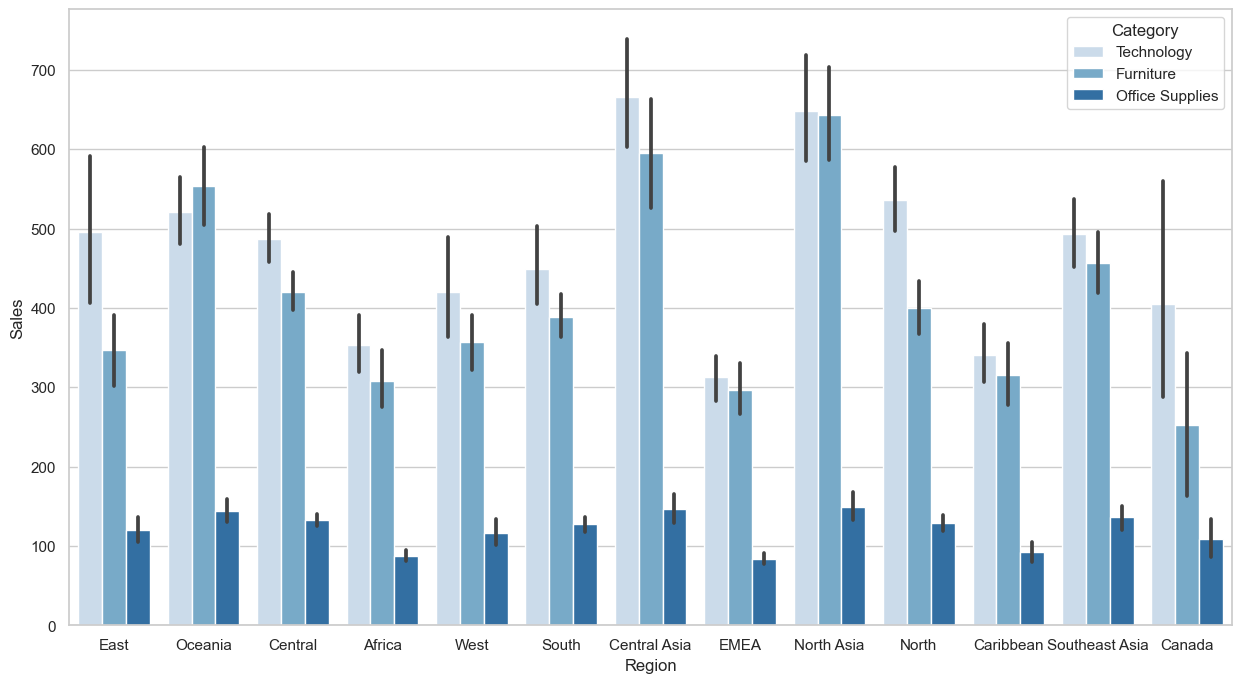

In [16]:
#Category wise sales in Each region
plt.figure(figsize=[15,8])
ax = sns.barplot(x="Region", y="Sales", hue="Category", data=df, palette="Blues")


Observation: In eachand every  region,sales for 'office supplies'are very poor. furniture and technology are well ahead.

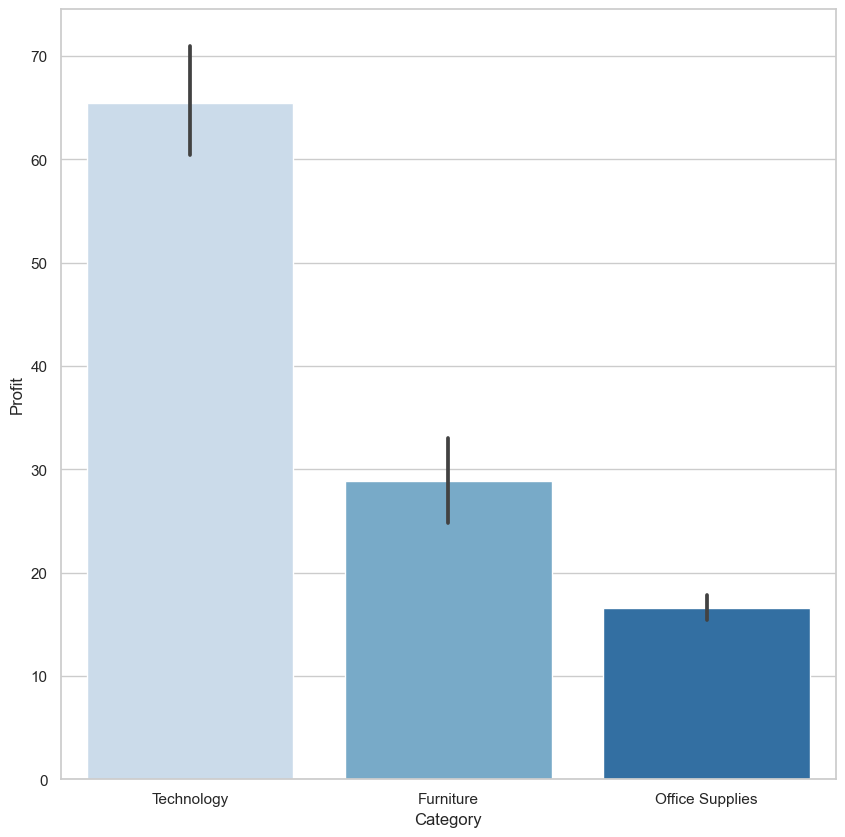

In [17]:
#Category Wise profit in the whole country
plt.figure(figsize=[10,10])
ax = sns.barplot(x="Category", y="Profit", data=df, palette="Blues")

Observation: Highest profit is generated from category = 'Technology' followed by furniture and office supplies

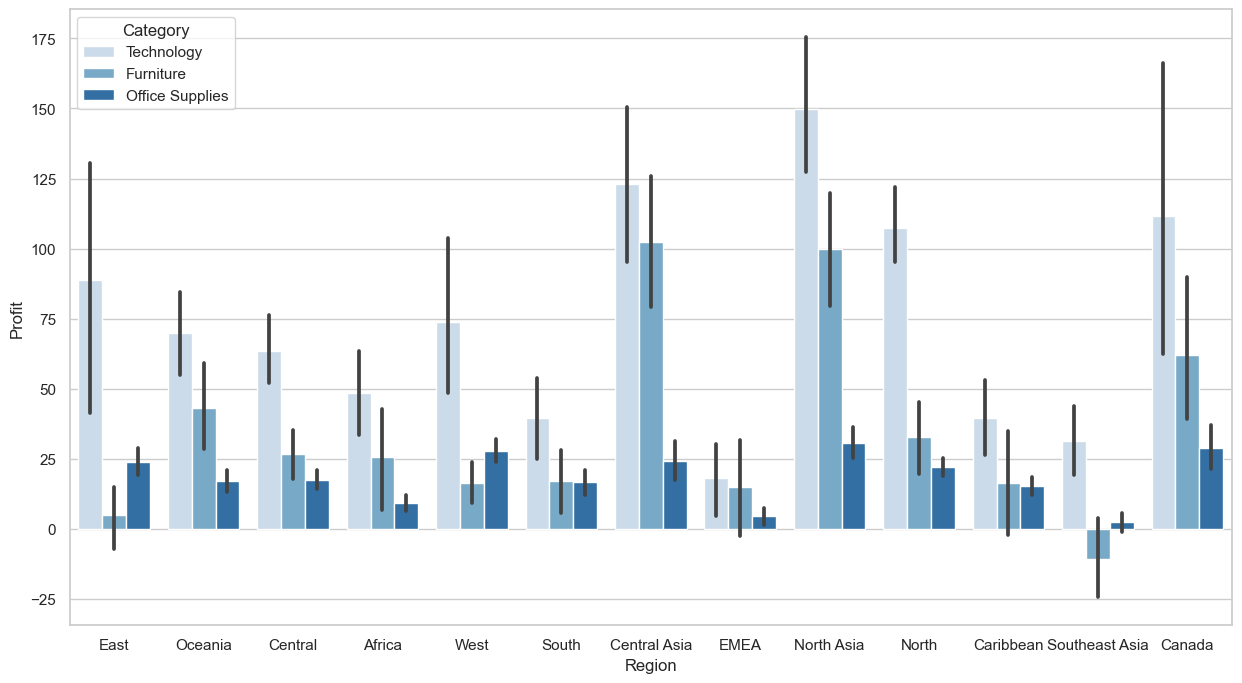

In [18]:
#Category wise Profit in Each Region
plt.figure(figsize=[15,8])
ax = sns.barplot(x="Region", y="Profit", hue="Category", data=df, palette="Blues")

Observation: Simply 'Technology' generates highest profit in every region. And 'office suplies' is lagging in all the regions except east region. Most importantly, at south east region, 'Furniture' is experiencing loss. 

<AxesSubplot: xlabel='Ship Mode', ylabel='count'>

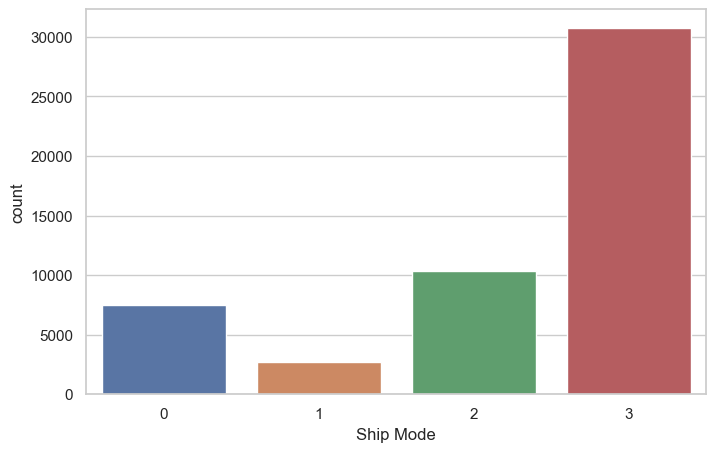

In [19]:
#data count by category
plt.figure(figsize=(8,5))
sns.countplot(x=df['Ship Mode'])

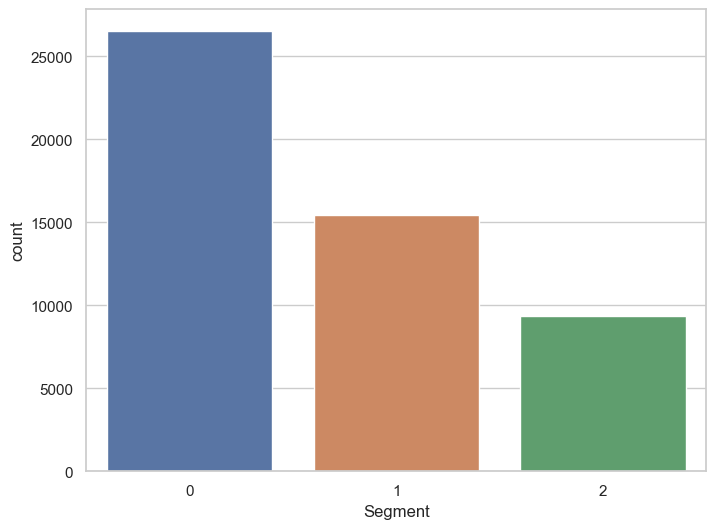

In [20]:
#data count by segment
plt.figure(figsize=(8,6))
sns.countplot(x=df['Segment'])
plt.show()

# Applying Models:
    
    Linear Regression

In [21]:
from sklearn.linear_model import LinearRegression, Lasso
from sklearn import metrics
from sklearn.model_selection import train_test_split

lr = LinearRegression()
la = Lasso(alpha=1.0)

X = df.iloc[:,[0,1,10,11,12,13]]
y = df.iloc[:,9]

In [22]:
print(X)
print(y)

       Ship Mode  Segment  Quantity  Discount    Profit  Shipping Cost
0              1        0         7       0.0  762.1845         933.57
1              2        1         9       0.1 -288.7650         923.63
2              0        0         9       0.1  919.9710         915.49
3              0        2         5       0.1  -96.5400         910.16
4              1        0         8       0.0  311.5200         903.04
...          ...      ...       ...       ...       ...            ...
51285          1        1         5       0.0    4.5000           0.01
51286          3        0         1       0.8   -1.1100           0.01
51287          1        2         3       0.0   11.2308           0.01
51288          3        2         2       0.0    2.4000           0.00
51289          2        0         3       0.0    1.8000           0.00

[51290 rows x 6 columns]
0        2309.650
1        3709.395
2        5175.171
3        2892.510
4        2832.960
           ...   
51285      65.

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)

print("X_train shape:\t",X_train.shape)
print("X_test shape:\t",X_test.shape)
print("y_train shape:\t",y_train.shape)
print("y_test shape:\t",y_test.shape)

X_train shape:	 (38467, 6)
X_test shape:	 (12823, 6)
y_train shape:	 (38467,)
y_test shape:	 (12823,)


In [24]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

lr.fit(X_train,y_train)


LinearRegression()

In [25]:
print("Test Accuracy Score:\t %.3f" % lr.score(X_test, y_test))

Test Accuracy Score:	 0.701


In [26]:
ypred = lr.predict(X_test)


In [27]:
print("\033[1m"+"For Linear Regression the results are:"+"\033[0m")
print("Mean Absolute Error:\t",metrics.mean_absolute_error(y_test,ypred))
print("Mean Squared Error:\t",metrics.mean_squared_error(y_test,ypred))
print("Root Mean Square Error:\t",np.sqrt(metrics.mean_absolute_error(y_test,ypred)))

For Linear Regression the results are:
Mean Absolute Error:	 117.55786095554166
Mean Squared Error:	 64519.0295757982
Root Mean Square Error:	 10.842410292713593


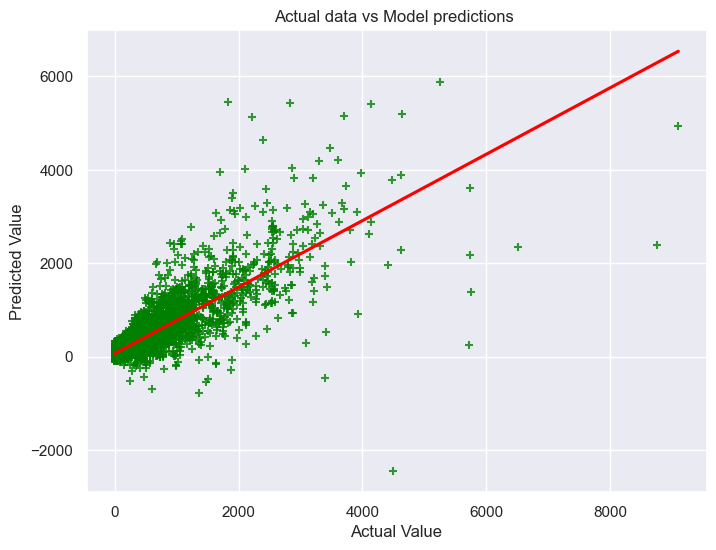

In [28]:
sns.set(rc = {'figure.figsize':(8,6)})
sns.regplot(x=y_test,y=ypred,ci=None,color="Green",marker="+",line_kws={"color":"Red"})
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
plt.title('Actual data vs Model predictions ')
plt.show()

Applying Lasso Regression

In [29]:
X2 = df.iloc[:,[0,1,10,11,12,13]]
y2 = df.iloc[:,9]

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.25, random_state=42)
la.fit(X2_train,y2_train)



Lasso()

In [30]:
la.coef_

array([ 42.65349669,  -0.        ,  22.09112054, 101.91767076,
         0.73387991,   5.62342708])

In [31]:
la.score(X2_test, y2_test), la.score(X2_train, y2_train)

(0.7027611190552607, 0.6528487102240117)

In [32]:
y2pred = la.predict(X2_test)

In [33]:
print("Test Accuracy Score:\t %.3f" % la.score(X2_test, y2_test))

Test Accuracy Score:	 0.703


In [34]:
print("\033[1m"+"For Lasso Regression the results are:"+"\033[0m")
print("Mean Absolute Error:\t",metrics.mean_absolute_error(y2_test,y2pred))
print("Mean Squared Error:\t",metrics.mean_squared_error(y2_test,y2pred))
print("Root Mean Square Error:\t",np.sqrt(metrics.mean_absolute_error(y2_test,y2pred)))

For Lasso Regression the results are:
Mean Absolute Error:	 117.43907258477358
Mean Squared Error:	 64124.52776394835
Root Mean Square Error:	 10.836930957829969


# Results

In [35]:
print("\033[1m"+"\t\tResults"+"\033[0m")
print("\n"+"-"*45)
print("\033[1m"+"For Linear Regression the results are:"+"\033[0m")
print("Test Accuracy Score:\t %.3f" % lr.score(X_test, y_test))
print("Mean Absolute Error:\t",metrics.mean_absolute_error(y_test,ypred))
print("Mean Squared Error:\t",metrics.mean_squared_error(y_test,ypred))
print("Root Mean Square Error:\t",np.sqrt(metrics.mean_absolute_error(y_test,ypred)))
print("\n"+"-"*45)
print("\033[1m"+"For Lasso Regression the results are:"+"\033[0m")
print("Test Accuracy Score:\t %.3f" % la.score(X2_test, y2_test))
print("Mean Absolute Error:\t",metrics.mean_absolute_error(y2_test,y2pred))
print("Mean Squared Error:\t",metrics.mean_squared_error(y2_test,y2pred))
print("Root Mean Square Error:\t",np.sqrt(metrics.mean_absolute_error(y2_test,y2pred)))
print("-"*45)

		Results

---------------------------------------------
For Linear Regression the results are:
Test Accuracy Score:	 0.701
Mean Absolute Error:	 117.55786095554166
Mean Squared Error:	 64519.0295757982
Root Mean Square Error:	 10.842410292713593

---------------------------------------------
For Lasso Regression the results are:
Test Accuracy Score:	 0.703
Mean Absolute Error:	 117.43907258477358
Mean Squared Error:	 64124.52776394835
Root Mean Square Error:	 10.836930957829969
---------------------------------------------
